In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

import tensorflow as tf

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC

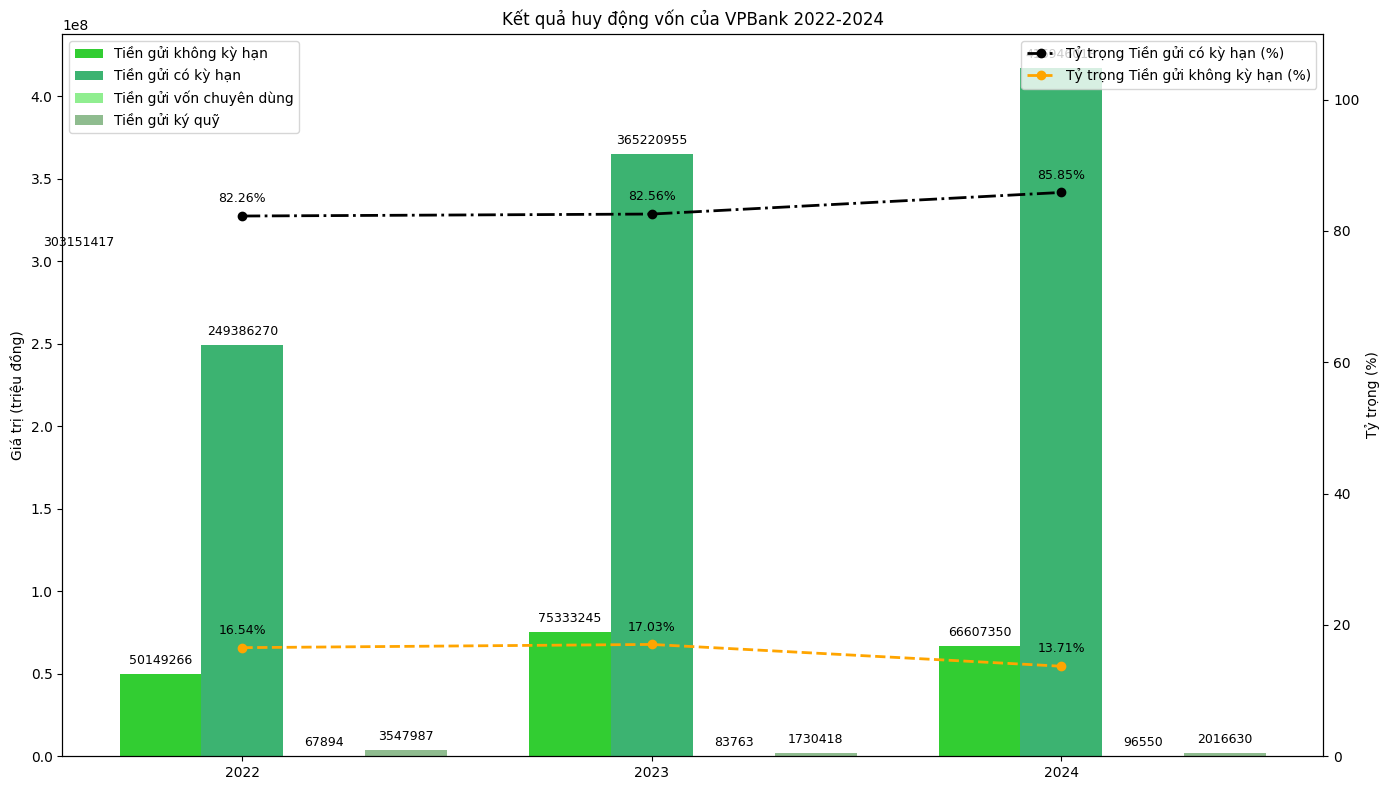

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Năm
years = ['2022', '2023', '2024']
x = np.arange(len(years))
width = 0.2

# Giá trị (triệu đồng)
total_deposits = np.array([303151417, 442368381, 485666548])
demand_deposits = np.array([50149266, 75333245, 66607350])
term_deposits = np.array([249386270, 365220955, 416946018])
special_fund_deposits = np.array([67894, 83763, 96550])
security_deposits = np.array([3547987, 1730418, 2016630])

# Tỷ trọng (%)
total_ratio = np.array([100, 100, 100])
demand_ratio = np.array([16.54, 17.03, 13.71])
term_ratio = np.array([82.26, 82.56, 85.85])
special_fund_ratio = np.array([0.02, 0.02, 0.02])
security_ratio = np.array([1.17, 0.39, 0.42])

fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ cột giá trị
bars2 = ax1.bar(x - width, demand_deposits, width, label='Tiền gửi không kỳ hạn', color='limegreen')
bars3 = ax1.bar(x, term_deposits, width, label='Tiền gửi có kỳ hạn', color='mediumseagreen')
bars4 = ax1.bar(x + width, special_fund_deposits, width, label='Tiền gửi vốn chuyên dùng', color='lightgreen')
bars5 = ax1.bar(x + 2*width, security_deposits, width, label='Tiền gửi ký quỹ', color='darkseagreen')

ax1.set_ylabel('Giá trị (triệu đồng)')
ax1.set_title('Kết quả huy động vốn của VPBank 2022-2024')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(loc='upper left')

# Hàm hiển thị số liệu trên cột
def autolabel(bars, ax, fmt='{:.0f}'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, color='black')

autolabel(bars1, ax1)
autolabel(bars2, ax1)
autolabel(bars3, ax1)
autolabel(bars4, ax1)
autolabel(bars5, ax1)

# Trục y phụ cho tỷ trọng %
ax2 = ax1.twinx()
line3, = ax2.plot(x, term_ratio, color='black', marker='o', linestyle='-.', linewidth=2, label='Tỷ trọng Tiền gửi có kỳ hạn (%)')
line2, = ax2.plot(x, demand_ratio, color='orange', marker='o', linestyle='--', linewidth=2, label='Tỷ trọng Tiền gửi không kỳ hạn (%)')

ax2.set_ylabel('Tỷ trọng (%)')
ax2.set_ylim(0, max(total_ratio)*1.1)
ax2.legend(loc='upper right')

# Hiển thị số liệu tỷ trọng trên line
for i in range(len(x)):
    ax2.annotate(f'{term_ratio[i]:.2f}%', (x[i], term_ratio[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black')
    ax2.annotate(f'{demand_ratio[i]:.2f}%', (x[i], demand_ratio[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()


In [16]:
pip install networkx matplotlib


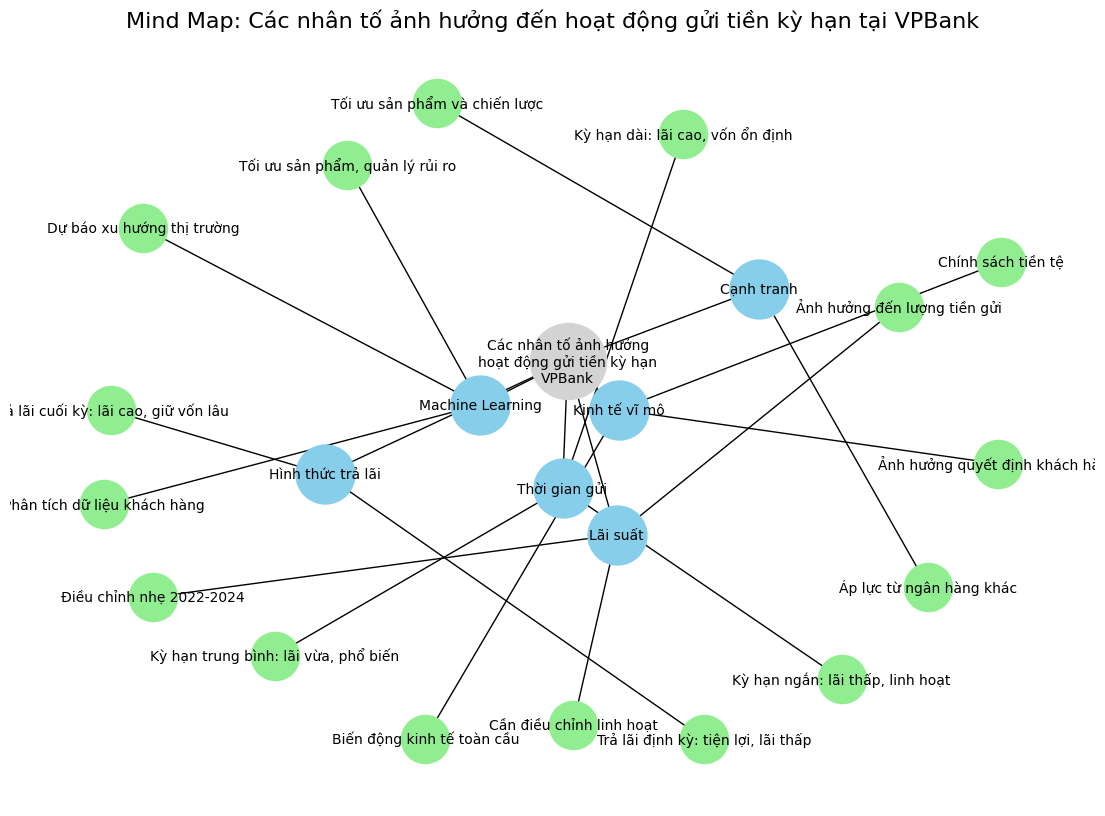

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm node trung tâm
center = "Các nhân tố ảnh hưởng\nhoạt động gửi tiền kỳ hạn\nVPBank"

# Các nhánh chính
factors = [
    "Lãi suất",
    "Thời gian gửi",
    "Hình thức trả lãi",
    "Cạnh tranh",
    "Kinh tế vĩ mô",
    "Machine Learning"
]

# Thêm các nhánh vào đồ thị
G.add_node(center)
for f in factors:
    G.add_node(f)
    G.add_edge(center, f)

# Thêm các ý nhỏ cho từng nhánh
details = {
    "Lãi suất": [
        "Điều chỉnh nhẹ 2022-2024",
        "Ảnh hưởng đến lượng tiền gửi",
        "Cần điều chỉnh linh hoạt"
    ],
    "Thời gian gửi": [
        "Kỳ hạn ngắn: lãi thấp, linh hoạt",
        "Kỳ hạn trung bình: lãi vừa, phổ biến",
        "Kỳ hạn dài: lãi cao, vốn ổn định"
    ],
    "Hình thức trả lãi": [
        "Trả lãi cuối kỳ: lãi cao, giữ vốn lâu",
        "Trả lãi định kỳ: tiện lợi, lãi thấp"
    ],
    "Cạnh tranh": [
        "Áp lực từ ngân hàng khác",
        "Tối ưu sản phẩm và chiến lược"
    ],
    "Kinh tế vĩ mô": [
        "Chính sách tiền tệ",
        "Biến động kinh tế toàn cầu",
        "Ảnh hưởng quyết định khách hàng"
    ],
    "Machine Learning": [
        "Phân tích dữ liệu khách hàng",
        "Dự báo xu hướng thị trường",
        "Tối ưu sản phẩm, quản lý rủi ro"
    ]
}

# Thêm các ý nhỏ vào đồ thị
for key, vals in details.items():
    for v in vals:
        G.add_node(v)
        G.add_edge(key, v)

# Vẽ đồ thị mind map
plt.figure(figsize=(14, 10))

pos = nx.spring_layout(G, k=1, seed=42)  # bố cục lực lò xo

# Vẽ các nút chính lớn hơn và màu khác
nx.draw_networkx_nodes(G, pos,
                       nodelist=[center],
                       node_color='lightgray',
                       node_size=3000) # Removed font_size here

nx.draw_networkx_nodes(G, pos,
                       nodelist=factors,
                       node_color='skyblue',
                       node_size=1800) # Removed font_size here

# Vẽ các nút con nhỏ
sub_nodes = [n for n in G.nodes if n not in factors + [center]]
nx.draw_networkx_nodes(G, pos,
                       nodelist=sub_nodes,
                       node_color='lightgreen',
                       node_size=1200) # Removed font_size here

# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, arrows=True)

# Vẽ nhãn các nút
nx.draw_networkx_labels(G, pos,
                        font_size=10,
                        font_family="sans-serif")

plt.axis('off')
plt.title("Mind Map: Các nhân tố ảnh hưởng đến hoạt động gửi tiền kỳ hạn tại VPBank", fontsize=16)
plt.show()

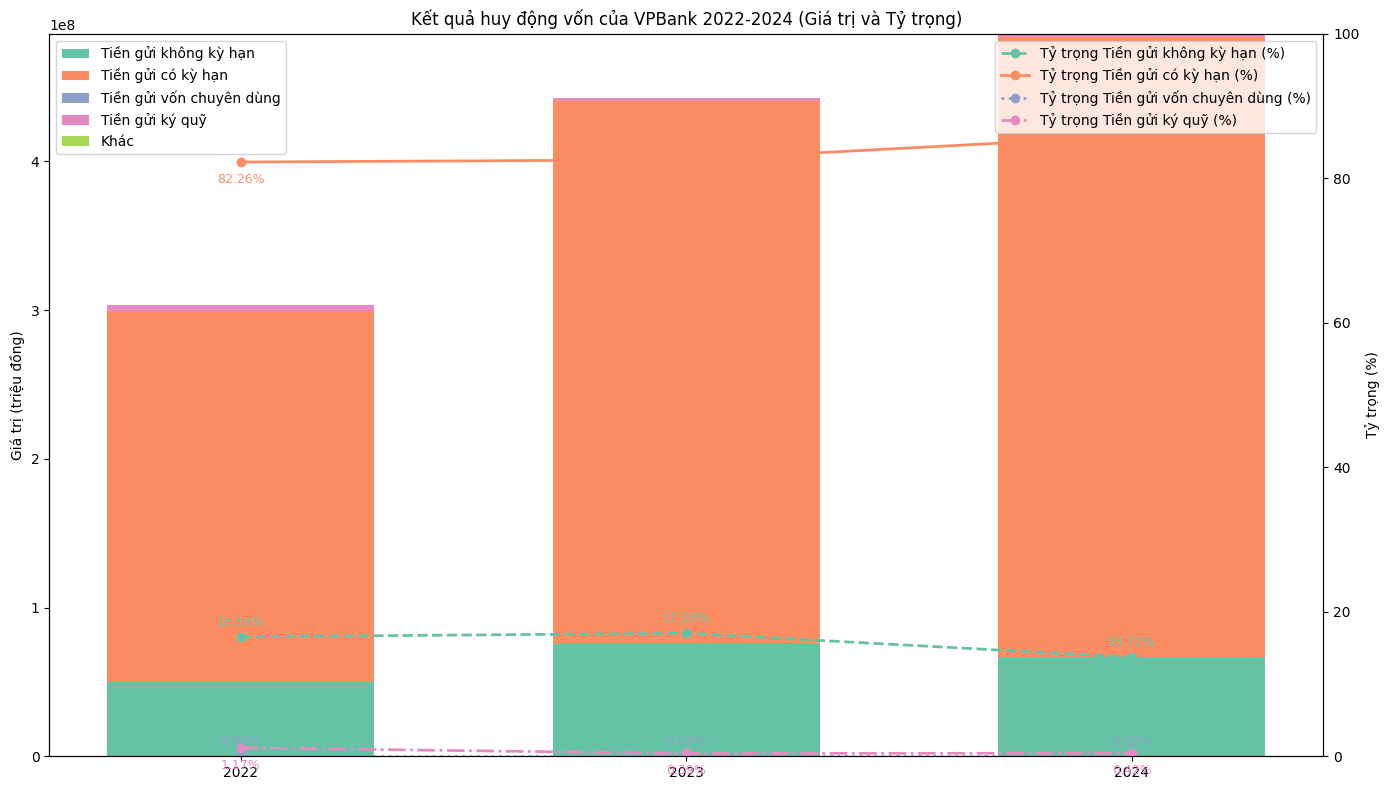

In [13]:
import matplotlib.pyplot as plt
import numpy as np

years = ['2022', '2023', '2024']
x = np.arange(len(years))
width = 0.6

# Giá trị (triệu đồng)
demand_deposits = np.array([50149266, 75333245, 66607350])
term_deposits = np.array([249386270, 365220955, 416946018])
special_fund_deposits = np.array([67894, 83763, 96550])
security_deposits = np.array([3547987, 1730418, 2016630])

# Tổng tiền gửi = tổng các loại tiền gửi + phần còn lại (để đảm bảo stack đủ)
total_deposits = np.array([303151417, 442368381, 485666548])
other_deposits = total_deposits - (demand_deposits + term_deposits + special_fund_deposits + security_deposits)

# Tỷ trọng (%)
demand_ratio = np.array([16.54, 17.03, 13.71])
term_ratio = np.array([82.26, 82.56, 85.85])
special_fund_ratio = np.array([0.02, 0.02, 0.02])
security_ratio = np.array([1.17, 0.39, 0.42])

fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ stacked bar
p1 = ax1.bar(x, demand_deposits, width, label='Tiền gửi không kỳ hạn', color='#66c2a5')
p2 = ax1.bar(x, term_deposits, width, bottom=demand_deposits, label='Tiền gửi có kỳ hạn', color='#fc8d62')
p3 = ax1.bar(x, special_fund_deposits, width, bottom=demand_deposits+term_deposits, label='Tiền gửi vốn chuyên dùng', color='#8da0cb')
p4 = ax1.bar(x, security_deposits, width, bottom=demand_deposits+term_deposits+special_fund_deposits, label='Tiền gửi ký quỹ', color='#e78ac3')
p5 = ax1.bar(x, other_deposits, width, bottom=demand_deposits+term_deposits+special_fund_deposits+security_deposits, label='Khác', color='#a6d854')

ax1.set_ylabel('Giá trị (triệu đồng)')
ax1.set_title('Kết quả huy động vốn của VPBank 2022-2024 (Giá trị và Tỷ trọng)')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.legend(loc='upper left')

# Trục y phụ cho tỷ trọng (%)
ax2 = ax1.twinx()
line1, = ax2.plot(x, demand_ratio, marker='o', color='#66c2a5', linestyle='--', linewidth=2, label='Tỷ trọng Tiền gửi không kỳ hạn (%)')
line2, = ax2.plot(x, term_ratio, marker='o', color='#fc8d62', linestyle='-', linewidth=2, label='Tỷ trọng Tiền gửi có kỳ hạn (%)')
line3, = ax2.plot(x, special_fund_ratio, marker='o', color='#8da0cb', linestyle=':', linewidth=2, label='Tỷ trọng Tiền gửi vốn chuyên dùng (%)')
line4, = ax2.plot(x, security_ratio, marker='o', color='#e78ac3', linestyle='-.', linewidth=2, label='Tỷ trọng Tiền gửi ký quỹ (%)')

ax2.set_ylabel('Tỷ trọng (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

# Hiển thị số liệu tỷ trọng trên điểm line
for i in range(len(x)):
    ax2.annotate(f'{demand_ratio[i]:.2f}%', (x[i], demand_ratio[i]), xytext=(0,8), textcoords='offset points', ha='center', fontsize=9, color='#66c2a5')
    ax2.annotate(f'{term_ratio[i]:.2f}%', (x[i], term_ratio[i]), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='#fc8d62')
    ax2.annotate(f'{special_fund_ratio[i]:.2f}%', (x[i], special_fund_ratio[i]), xytext=(0,8), textcoords='offset points', ha='center', fontsize=9, color='#8da0cb')
    ax2.annotate(f'{security_ratio[i]:.2f}%', (x[i], security_ratio[i]), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=9, color='#e78ac3')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path
file_path = '/content/drive/MyDrive/KLTN 2025/bank_clean (1).csv'

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/KLTN 2025/bank_clean (1).csv')
df
# # Display the first few rows
# df.head()

Mounted at /content/drive


,year,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2024,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no
1,2024,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no
2,2024,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no
3,2024,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no
4,2024,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33298,2022,43,services,married,secondary,no,6346,yes,no,cellular,11,may,0.95,1,-1,0,unknown,no
33299,2022,44,blue-collar,married,secondary,no,130,yes,yes,cellular,11,may,8.80,1,-1,0,unknown,no
33300,2022,36,technician,married,secondary,no,483,yes,no,cellular,11,may,2.98,1,304,2,failure,no
33301,2022,50,admin.,married,secondary,no,284,yes,no,cellular,11,may,1.77,1,278,3,failure,no


#age


<ipython-input-20-5f62da9f9393>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age = df.groupby('age_group')['y'].count()
<ipython-input-20-5f62da9f9393>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yes_by_age = df[df['y'] == 'yes'].groupby('age_group')['y'].count()


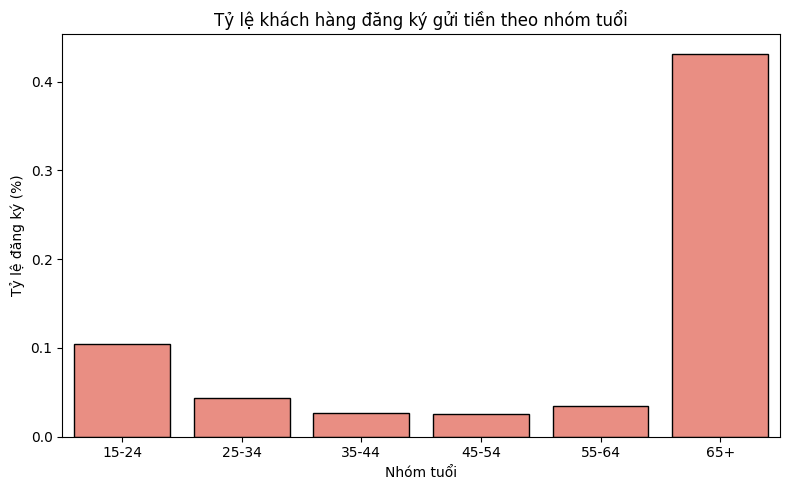

In [ ]:
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
total_by_age = df.groupby('age_group')['y'].count()
yes_by_age = df[df['y'] == 'yes'].groupby('age_group')['y'].count()
conversion_rate = (yes_by_age / total_by_age).fillna(0)
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, color='salmon', edgecolor='k')
plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.tight_layout()
plt.show()


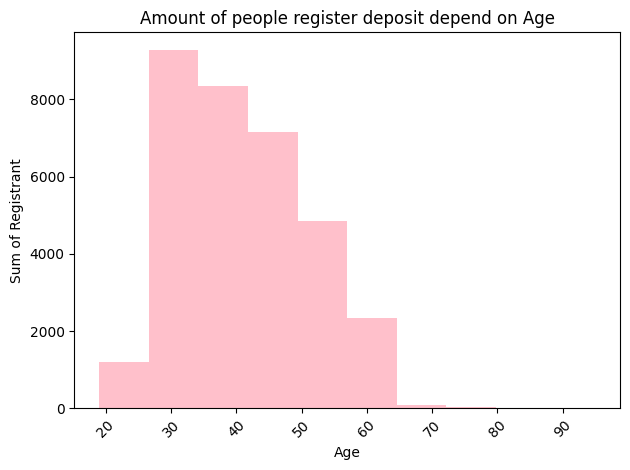

In [ ]:
plt.hist(df['age'], color="pink")
plt.title('Số lượng người đăng ký theo độ tuổi')
plt.xlabel('uổi')
plt.ylabel('Sum of Registrant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



A majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.
Phần lớn khách hàng được gọi có độ tuổi từ 30 đến 40 (33 đến 48 tuổi nằm trong khoảng từ phần trăm thứ 25 đến 75). Phân bố độ tuổi của khách hàng khá bình thường với độ lệch chuẩn nhỏ.

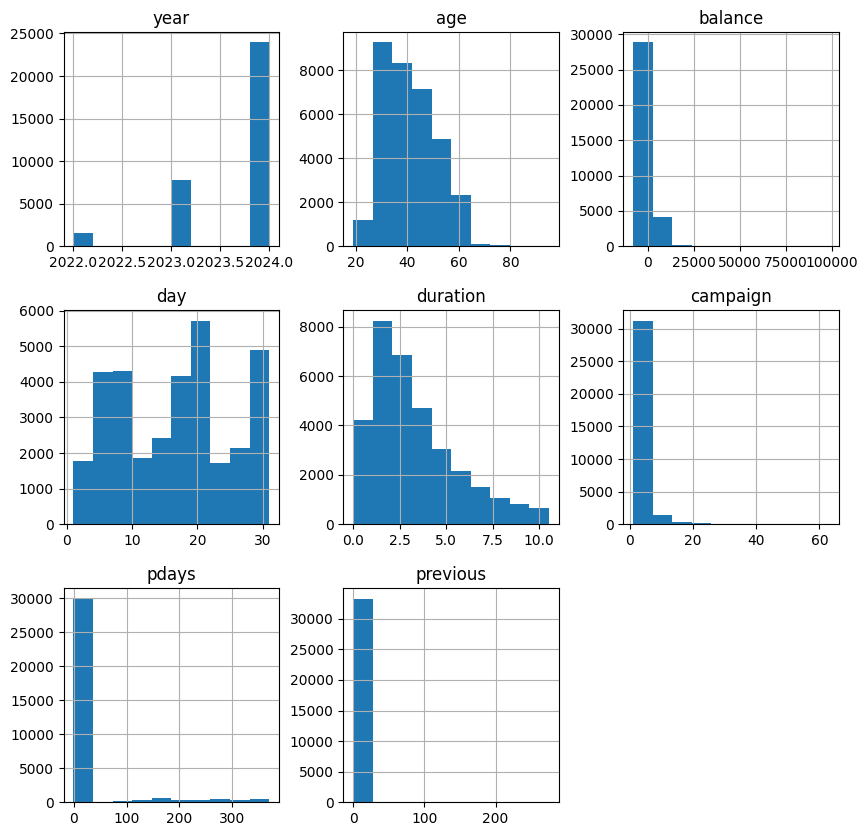

In [ ]:

df.hist(figsize=(10,10))
plt.show()

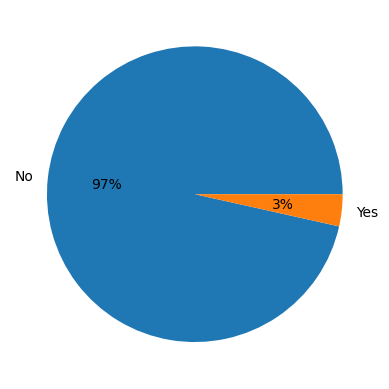

In [ ]:

labels = ['No', 'Yes']
y_data = df.groupby('y')['y'].count()
plt.pie(y_data,labels=labels, autopct='%.0f%%')
plt.show()

## duration


In [ ]:
# Bước 1: Chuyển đổi duration từ giây sang giờ (nếu chưa có)
df['duration_hours'] = df['duration'] / 3600

# Bước 2: Tính giá trị lớn nhất của thời lượng (giờ)
max_duration_hr = df['duration_hours'].max()

# Bước 3: Tạo các bin thời lượng (giờ)
bins_hr = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
if max_duration_hr > 0.25:
    bins_hr.append(max_duration_hr)  # đảm bảo bin cuối bao hết

# Bước 4: Gán nhãn tương ứng (số nhãn = số bin - 1)
labels_hr = ['0–3m', '3–6m', '6–9m', '9–12m', '12–15m', '>15m']

# Bước 5: Tạo nhóm thời lượng
df['duration_group_hr'] = pd.cut(
    df['duration_hours'],
    bins=bins_hr,
    labels=labels_hr[:len(bins_hr)-1],  # đảm bảo khớp độ dài
    include_lowest=True,
    right=False,
    duplicates='drop'
)


In [ ]:
total_by_group = df.groupby('duration_group_hr')['y'].count()
yes_by_group = df[df['y'] == 'yes'].groupby('duration_group_hr')['y'].count()
rate_by_group = (yes_by_group / total_by_group).fillna(0)



<ipython-input-29-0e6033ad4a7a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_group = df.groupby('duration_group_hr')['y'].count()
<ipython-input-29-0e6033ad4a7a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yes_by_group = df[df['y'] == 'yes'].groupby('duration_group_hr')['y'].count()


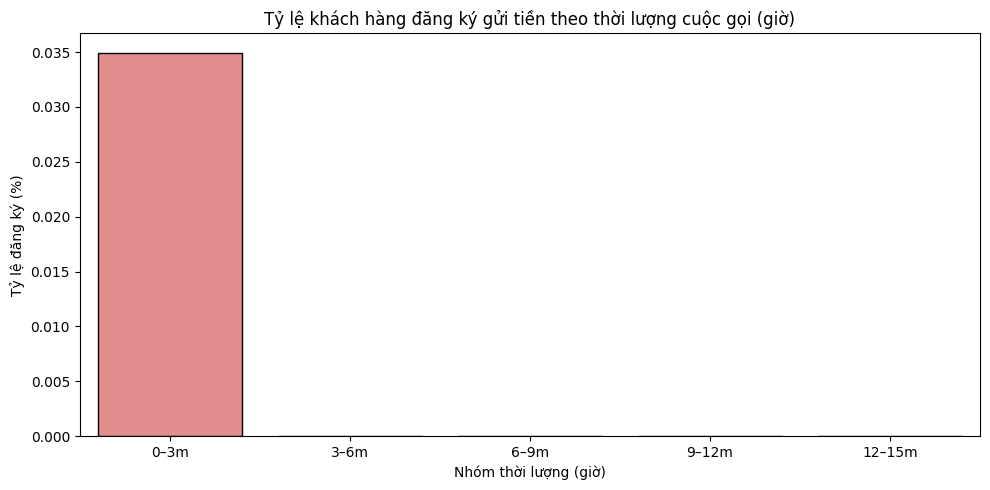

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=rate_by_group.index, y=rate_by_group.values, color='lightcoral', edgecolor='k')
plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo thời lượng cuộc gọi (giờ)")
plt.xlabel("Nhóm thời lượng (giờ)")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.tight_layout()
plt.show()


## age

<ipython-input-8-bc7033f040e0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["y"]=='yes']["age"], shade=True, color="blue", label="Choose", ax=ax)
<ipython-input-8-bc7033f040e0>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["y"]=='no']["age"], shade=True, color="green", label="Did not choose", ax=ax)


Text(0, 0.5, 'Y')

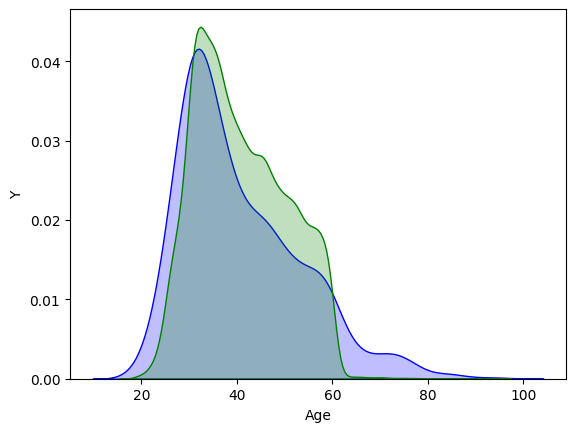

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["y"]=='yes']["age"], shade=True, color="blue", label="Choose", ax=ax)
sns.kdeplot(df[df["y"]=='no']["age"], shade=True, color="green", label="Did not choose", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Y")

## campaign

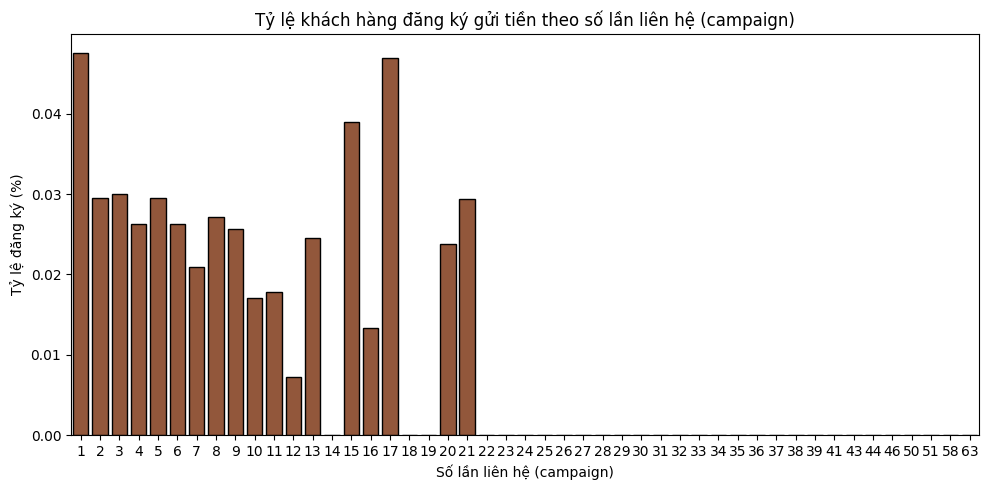

In [ ]:


# Bước 1: Tính số lượng theo từng giá trị campaign
total_by_campaign = df.groupby('campaign')['y'].count()
yes_by_campaign = df[df['y'] == 'yes'].groupby('campaign')['y'].count()

# Bước 2: Tính tỷ lệ đăng ký
rate_by_campaign = (yes_by_campaign / total_by_campaign).fillna(0)

# Bước 3: Vẽ biểu đồ tỷ lệ đăng ký theo số lần liên hệ (campaign)
plt.figure(figsize=(10, 5))
sns.barplot(x=rate_by_campaign.index, y=rate_by_campaign.values, color='sienna', edgecolor='k')

plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo số lần liên hệ (campaign)")
plt.xlabel("Số lần liên hệ (campaign)")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.tight_layout()
plt.show()


Số lần gọi (campaign) là biến có phân phối lệch phải.

Ngân hàng chủ yếu chỉ cần gọi 1–3 lần là đủ – gọi quá nhiều có thể gây khó chịu và không hiệu quả.

Đây là một biến quan trọng trong mô hình dự đoán – gọi quá nhiều thường không mang lại kết quả "yes".

## Job

<ipython-input-17-1862bb71e9ec>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='mako', edgecolor='k')


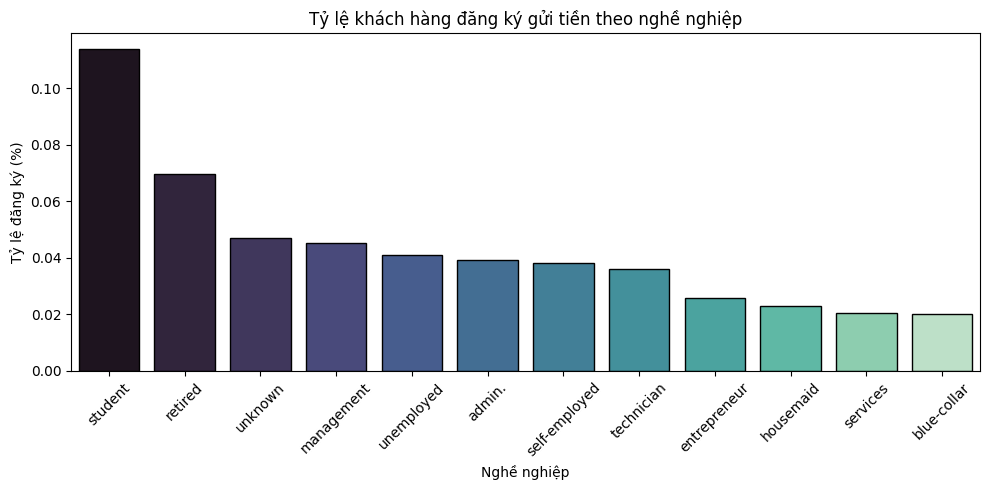

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tổng số người theo nghề
total_per_job = df.groupby('job')['y'].count()

# Tính số người đăng ký theo nghề
yes_per_job = df[df['y'] == 'yes'].groupby('job')['y'].count()

# Tính tỷ lệ đăng ký gửi tiền theo nghề
conversion_rate = (yes_per_job / total_per_job).sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='mako', edgecolor='k')
plt.title('Tỷ lệ khách hàng đăng ký gửi tiền theo nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Tỷ lệ đăng ký (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Education

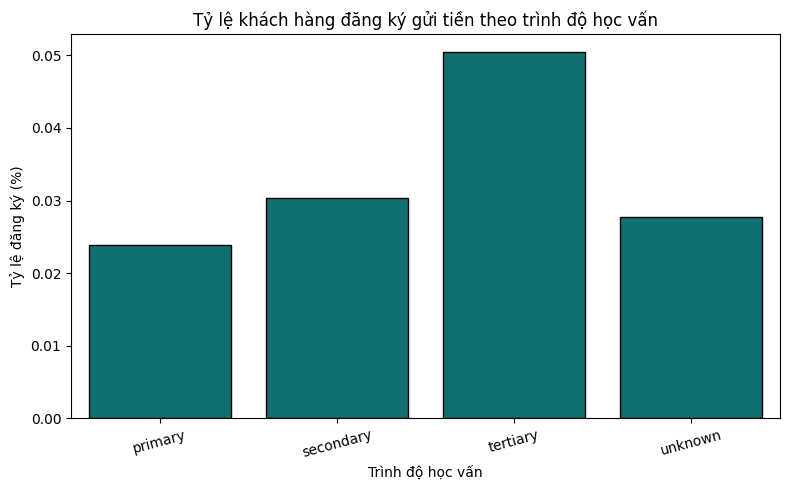

In [ ]:


# Bước 1: Tính tổng số người theo từng nhóm education
total_by_edu = df.groupby('education')['y'].count()

# Bước 2: Tính số người đăng ký theo education
yes_by_edu = df[df['y'] == 'yes'].groupby('education')['y'].count()

# Bước 3: Tính tỷ lệ đăng ký
rate_by_edu = (yes_by_edu / total_by_edu).fillna(0)

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(x=rate_by_edu.index, y=rate_by_edu.values, color='teal', edgecolor='k')

plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo trình độ học vấn")
plt.xlabel("Trình độ học vấn")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


#housing

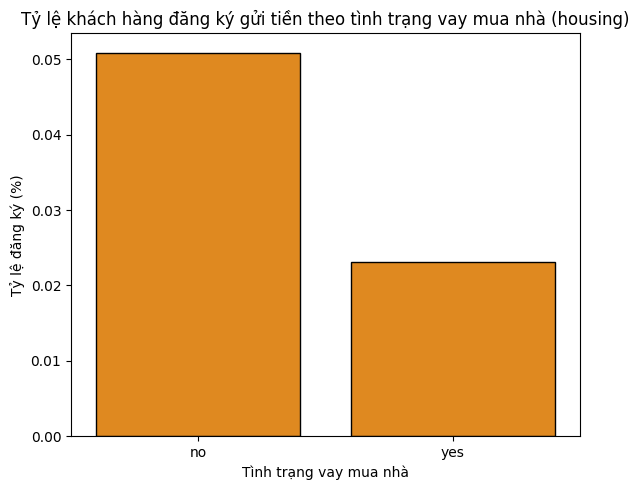

In [ ]:


# Bước 1: Tính tổng số khách hàng theo nhóm housing (yes/no/unknown)
total_by_housing = df.groupby('housing')['y'].count()

# Bước 2: Tính số người đăng ký gửi tiền theo nhóm housing
yes_by_housing = df[df['y'] == 'yes'].groupby('housing')['y'].count()

# Bước 3: Tính tỷ lệ đăng ký
rate_by_housing = (yes_by_housing / total_by_housing).fillna(0)

# Bước 4: Vẽ biểu đồ tỷ lệ đăng ký
plt.figure(figsize=(6, 5))
sns.barplot(x=rate_by_housing.index, y=rate_by_housing.values, color='darkorange', edgecolor='k')

plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo tình trạng vay mua nhà (housing)")
plt.xlabel("Tình trạng vay mua nhà")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.tight_layout()
plt.show()


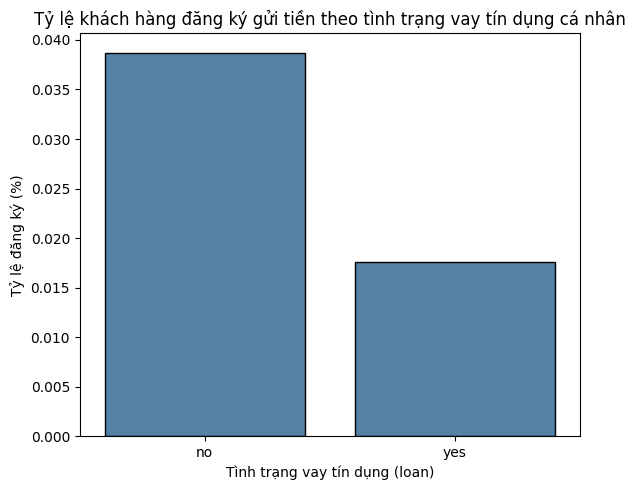

In [ ]:


# Bước 1: Tính tổng số khách hàng theo từng nhóm loan
total_by_loan = df.groupby('loan')['y'].count()

# Bước 2: Tính số người đăng ký gửi tiền theo nhóm loan
yes_by_loan = df[df['y'] == 'yes'].groupby('loan')['y'].count()

# Bước 3: Tính tỷ lệ đăng ký
rate_by_loan = (yes_by_loan / total_by_loan).fillna(0)

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(x=rate_by_loan.index, y=rate_by_loan.values, color='steelblue', edgecolor='k')

plt.title("Tỷ lệ khách hàng đăng ký gửi tiền theo tình trạng vay tín dụng cá nhân")
plt.xlabel("Tình trạng vay tín dụng (loan)")
plt.ylabel("Tỷ lệ đăng ký (%)")
plt.tight_layout()
plt.show()
